##Advanced Validation Assignment
<p style="color:blue">
Import pandas, numpy, Sci Toolkit (sklearn) and libraries for implementing Random Forest model, K-Fold Cross validation and measuring performance
</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


<p style="color:blue">
Import breast cancer dataset as a Pandas dataframe
</p>

In [2]:
data = pd.read_csv("breast_cancer.csv")

<p style="color:blue">
Let us peek at a few records in the dataframe
</p>

In [3]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


<p style="color:blue">
Drop columns that will not be useful for prediction
</p>

In [4]:
data = data.drop(['Unnamed: 0', 'id number'], axis=1)

<p style="color:blue">
Set 'malignant' as the feature we will predict
</p>

In [5]:
y = data.pop("malignant")

<p style="color:blue">
Create a test-train data split
</p>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

###RandomForestClassifier Model
<p style="color:blue">
Let us create a RandomForestClassifier Model and employ GridSearchCV
</p>

In [7]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]

rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=1)

<p style="color:blue">
Fit the estimator with training dataset
</p>

In [8]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None,
       estimator=RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

<p style="color:blue">
Identify the best RandomForestClassifier parameters. 
</p>

In [9]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=5, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [10]:
best_rfc = estimator.best_estimator_

###Model Performance

<p style="color:blue">
Let us look at confusion matrix for model
</p>

In [11]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[93  2]
 [ 2 43]]


<p style="color:red">
The confusion matrix lists the <br>
[TN, FP<br>
 FN, TP]<br>where: <br>
True Negatives (TN) or 'Non Malignant' tumors correctly classified as 'Non Malignant' = 93<br>
False Positives (FP) or 'Non Malignant' tumors incorrectly classified as 'Malignant' = 2<br>
False Negatives (FN) or 'Malignant' tumors incorrectly classified as 'Non Malignant' = 2<br>
True Positives (TP) or 'Malignant' tumors correctly classified as 'Malignant' = 43</p>

<p style="color:blue">
Compute model accuracy score 
</p>

In [12]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.971428571429


<p style="color:red">
Accuracy is calculated as (TN+TP) /(TN+FP+FN+TP) = (93+43)/(93+2+2+43) = 136/140 = 0.9714
</p>

<p style="color:blue">
Let us look at classification report for model. This lists the precision, recall, f1-score and support
</p>

In [13]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        95
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140



<p style="color:red">
Precision is calculated as TP/(TP+FP) = 43/(43+2) = 43/45 = 0.9556<br>
Thus the model will correctly identify 95% of malignant tumors <br>
<br>
Recall is calculated as TP / (TP+FN) = 43/(43+2) = 43/45 = 0.9556<br>
Thus of the tumors identified as maligant, 93% will be truly malignant
</p>

<p style="color:blue">
Compute AUC score for model
</p>

In [14]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.995789473684


<p style="color:red">
The AUC score of this model is very high and is desirable. It indicates that the model covers 99.6% of Area Under the 'Receiver Operator Characteristic' Curve (ROC). It indicates goodness of the model is very high
</p>

<p style="color:blue">
Plot a ROC curve 
</p>

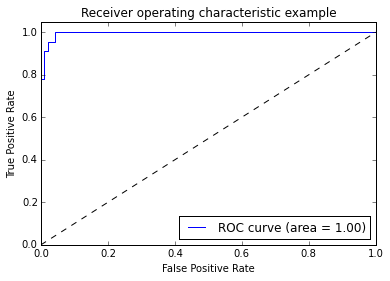

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

###K-Fold Cross Validation
<p style="color:blue">
Run K-Fold cross validation with 10 folds and obtain the cross validation score
</p>

In [16]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [17]:
scores

array([ 0.92957746,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  1.        ])

<p style="color:blue">
Compute mean cross validation score across the 10 folds and the score range
</p>

In [18]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.970080 +/-  0.018412
95 percent probability that if this experiment were repeated over and over the average score would be between 0.951668 and 0.988492


<p style="color:red">
K-Fold CV score falls within a range between 0.951668 and 0.988492 compared to the single holdout AUC of 0.995789
</p>